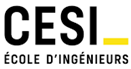
# <center><b><u>Livrable final, implémentation et exploitation, Algorithme mTSP :</u></b> </center>

### <u><b>Groupe :</b></u>
- BARRY Mamadou
- SADOWSKI Yann
- RAMBAUT Anthony
- VICINI Alexandre
- ALLIAS Gautier

FISA A3 INFO Pau

### <u><b>Données nécessaire au fonctionnement de l'algorithme :</b></u>
Les données que notre algorithme a besoin pour fonctionner peuvent provenir de 2 sources : 
- une génération automatique et aléatoire de points au sein d'un plan en deux dimensions 
- la lecture des données depuis un fichier .tsp qui suit le formalisme suivant : 

    NAME : filename<br>
    COMMENT : Rattled grid (Pulleyblank)<br>
    TYPE : TSP<br>
    DIMENSION : n<br>
    EDGE_WEIGHT_TYPE : EUC_2D<br>
    NODE_COORD_SECTION<br>
      1  6  4<br>
      2 15 15<br>
      n xn yn<br>
    EOF


### <u><b>Fonctionnement de l'algorithme :</b></u>
Voici l'algorithme de façon simplifié : <br>
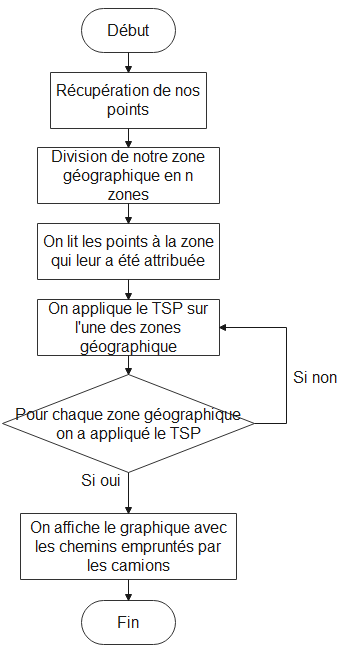

### <u><b>Plan d'experience : </b></u>
1. Définir les objectifs de l'expérience :
    - Le plus petit temps d'éxécution
    - le poids le plus petit
    - une solution de bonne qualité -> une bonne répartition des villes entre les véhicules<br><br>

2. Choix des instances du problème : 
    - Une instance du rat99 et des instances pré-générées de 2 000, 4 000, 6 000 et 8 000 villes
        -> Utilisées pour les comparatifs
    - Une génération automatique de villes dans un plan en 2 dimensions 
        -> Utilisé pour montrer le fonctionnement de l'algorithme<br><br>
        
3. Approche : 
    - On va exécuter l'algorithme avec Rat99 en faisant évoluer le nombre de camions(2, 3, 5 et 7 camioms)
        -> Mesure du poids maximum, minimum et total
        -> Mesure du temps d'exécution
    - On va exécuter l'algorithme avec des instances de 2 000, 4 000, 6 000 et 8 000 villes
        -> Mesure de l'évolution du temps d'exécution en fonction du nombre de villes

Pour les étapes suivantes de notre plan d'experience : 

4. Conception de l'experience 
5. Mise en oeuvre et exécution de l'experience
6. Analyse
7. Interprétation 

Elles sont réparties dans la suite de ce notebook

### <u><b>Implémentation de l'algorithme :</b></u>
Import des nos bibliothèques :

In [ ]:
import math
import random
import matplotlib.pyplot as plt
import datetime

Nos fonctions :

In [ ]:
# Distance between two points
def distance(point1, point2):
    return math.sqrt((point2[0] - point1[0]) ** 2 + (point2[1] - point1[1]) ** 2)

In [ ]:
# MTSP TimeTraveler Algorithm
def MTSP_TimeTraveler(Set_Points, num_vehicules):

    # For calculating execution time
    time_start = datetime.datetime.now()

    # Copy the set points
    points = Set_Points.copy()

    # Determine the number of geographic zones based on the number of trucks
    num_zones = min(num_vehicules, len(points))
    geographic_zones = divide_geographic_area(num_zones)

    # Assign points to geographic zones
    points_per_zone = [[] for _ in range(num_zones)]
    for point in points:
        assigned_zone = assign_to_zone(point, geographic_zones)
        points_per_zone[assigned_zone].append(point)

    routes = []

    # Solve TSP for each zone
    for zone_points in points_per_zone:
        route = TSP_TimeTraveler(zone_points, depot)  # Pass depot as a parameter
        routes.append(route)

    # Add depot to each route
    for route in routes:
        route.insert(0, depot)
        route.append(depot)

    # For calculating execution time
    time_end = datetime.datetime.now()
    delta = (time_end - time_start).total_seconds()
    
    return routes, delta

In [ ]:
# Divide the geographic area into n sectors of a circle
def divide_geographic_area(num_zones):
    geographic_zones = []

    center = depot  # Center of the circle
    radius = 50  # Radius of the circle

    # Calculate the angle between the center and the depot
    depot_angle = math.atan2(depot[1] - center[1], depot[0] - center[0])

    for i in range(num_zones):
        angle_start = (2 * math.pi / num_zones) * i + depot_angle
        angle_end = (2 * math.pi / num_zones) * (i + 1) + depot_angle

        x_start = center[0] + radius * math.cos(angle_start)
        y_start = center[1] + radius * math.sin(angle_start)

        x_end = center[0] + radius * math.cos(angle_end)
        y_end = center[1] + radius * math.sin(angle_end)

        geographic_zones.append([x_start, x_end, y_start, y_end])

    return geographic_zones

In [ ]:
# Assign a point to a geographic zone
def assign_to_zone(point, geographic_zones):
    center = depot  # Center of the circle

    # Calculate the angle between the center and the point
    angle = math.atan2(point[1] - center[1], point[0] - center[0])

    # Convert the angle to a positive value between 0 and 2*pi
    if angle < 0:
        angle += 2 * math.pi

    # Determine the zone index based on the angle
    zone_index = int(angle / (2 * math.pi / len(geographic_zones)))

    return zone_index

In [ ]:
# TSP TimeTraveler Algorithm
def TSP_TimeTraveler(points, depot):
    route = []

    if len(points) < 1:
        # If there are no points, return an empty route
        return route

    if len(points) < 2:
        # If there is only one point, return the point as the route
        route = [points[0], points[0]]  # Connect the start point with the finish point
        return route

    # Take 3 points at random
    route.append(points.pop(random.randint(0, len(points) - 1)))
    route.insert(0, points.pop(random.randint(0, len(points) - 1)))
    route.insert(1, points.pop(random.randint(0, len(points) - 1)))

    # Calculating the initial route length
    Length = (
        int(
            distance(route[0], route[1])
            + distance(route[1], route[-1])
            + distance(route[-1], route[0])
        )
    )

    # Time Traveler Algorithm
    while len(points) > 0:
        # Take a random point from the Set
        point = points.pop(random.randint(0, len(points) - 1))

        ###############################################################################################################
        #### Finding the closest route segment by calculation all lengths possibilities and finding the minimum one ####
        ###############################################################################################################
        Set_Lengths = []
        for i in range(1, len(route)):
            # Set of Lengths when the point is on each route segment except the last one
            L = (
                Length
                - distance(route[i - 1], route[i])
                + distance(route[i - 1], point)
                + distance(point, route[i])
            )
            Set_Lengths.append((i, L))

        # Adding the last length when the point is on the last segment
        L = (
            Length
            - distance(route[-1], route[0])
            + distance(route[-1], point)
            + distance(point, route[0])
        )
        Set_Lengths.append((0, L))

        ###############################################################################################################
        ###############################################################################################################

        # Sorting the set of lengths
        Set_Lengths.sort(key=lambda k: k[1])

        # Inserting the point on the minimum length segment
        route.insert(Set_Lengths[0][0], point)

        # Updating the new route length
        Length = Set_Lengths[0][1]

    # Connecting the start point with the finish point
    route.append(route[0])

    return route

### <u><b>Execution de l'algorithme avec une instance aléatoire  :</b></u>


Solving MTSP
MTSP solved
Execution time:  6.673946 secs

Weight of Vehicle 1: 1134.3794111953544
Weight of Vehicle 2: 933.0812338870753
Weight of Vehicle 3: 1128.0244029978876
Weight of Vehicle 4: 1120.4158978068697
Weight of Vehicle 5: 834.0217930941319
Weight of Vehicle 6: 1177.5670939733773
Total Weight: 6327.489832954696


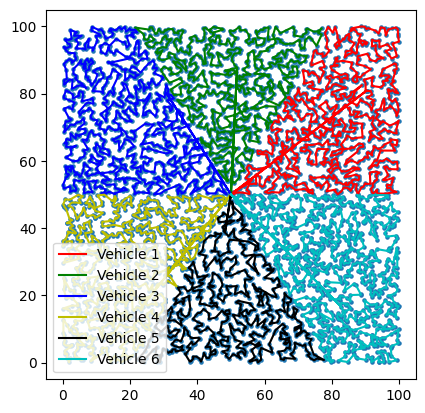

In [11]:
#######################
# Testing the Algorithm#
#######################

# Size of the set
size = 5000

depot = [50, 50]

# Number of salesmen (vehicles)
num_vehicules = 6

# Generate a set of random 2D points
points = []
for i in range(size):
    points.append([random.uniform(0, 100), random.uniform(0, 100)])

    
print("Solving MTSP")
# Solve MTSP
routes, delta = MTSP_TimeTraveler(points, num_vehicules)

print("MTSP solved")
print("Execution time: ", delta, "secs")

# Plot the solution
colors = ['r', 'g', 'b', 'y', 'k', 'c']  # Color for each vehicle

total_weight = 0

print()
for i, route in enumerate(routes):
    color = colors[i % len(colors)]  # Get a color for the current vehicle
    plt.plot(*zip(*route), color=color, label=f'Vehicle {i + 1}')

    # Calculate and display the weight of the route
    route_weight = sum(distance(route[j], route[j + 1]) for j in range(len(route) - 1))
    
    print(f'Weight of Vehicle {i + 1}: {route_weight}')
    
    total_weight += route_weight

# Display the total weight
print(f'Total Weight: {total_weight}')    

# Add the last part of the trip (return to depot)
for route in routes:
    plt.plot([route[-1][0], route[0][0]], [route[-1][1], route[0][1]], color='black')

plt.scatter(*zip(*points), s=5)
plt.legend()
plt.axis('scaled')
plt.show()

### <u><b>Execution de l'algorithme avec des instances prédéfinies et analyse des performances :</b></u>

##### <u><b>Rat99 avec 2, 3, 5 et 7 camions :</b></u>
Nouvelles fonctions utilisable pour la lecture du fichier .tsp :

In [15]:
# Read the TSP instance from a file
def read_tsp_file(filename):
    points = []
    weights = []  # List of weights for each point

    with open(filename, "r") as file:
        for line in file:
            if line.startswith("NODE_COORD_SECTION"):
                break
        for line in file:
            if line.startswith("EOF"):
                break
            data = line.strip().split()
            point = list(map(float, data[1:2]))  # Extract coordinates
            weight = float(data[2])  # Extract weight
            points.append(point)
            weights.append(weight)

    # Combine coordinates and weights into a single list
    points_with_weights = [point + [weight] for point, weight in zip(points, weights)]

    return points_with_weights

In [83]:
# Visualize the routes
def visualize_routes(routes):
    plt.figure()
    colors = ["r", "g", "b", "c", "m", "y"]
    for i, route in enumerate(routes):
        x = [point[0] for point in route]
        y = [point[1] for point in route]
        color = colors[i % len(colors)]
        plt.subplot(1, 2, 1)
        plt.plot(x, y, marker="o", color=color, label="Vehicle " + str(i+1))
    
    # Ajouter la légende
    plt.legend()

    plt.show()

<u><b>Execution :</b></u><br>
Exemple d'exécution avec rat99 et 4 camions : <a name="exempleRat99"></a>

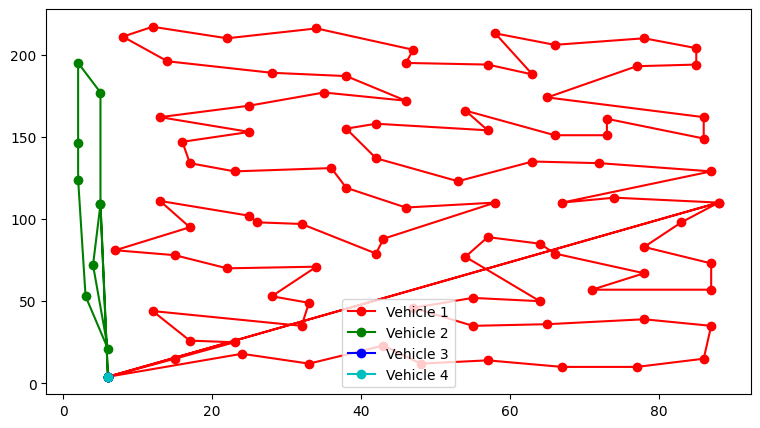

In [84]:
filename = "Instances/rat99.tsp"  # Modify this with the path to your file
num_salesmen = 4  # Modify the number of salesmen as desired
points = read_tsp_file(filename)
depot = points[0]
routes, delta = MTSP_TimeTraveler(points, num_salesmen)
visualize_routes(routes)

Analyse statistique : 

Solving MTSP
MTSP solved


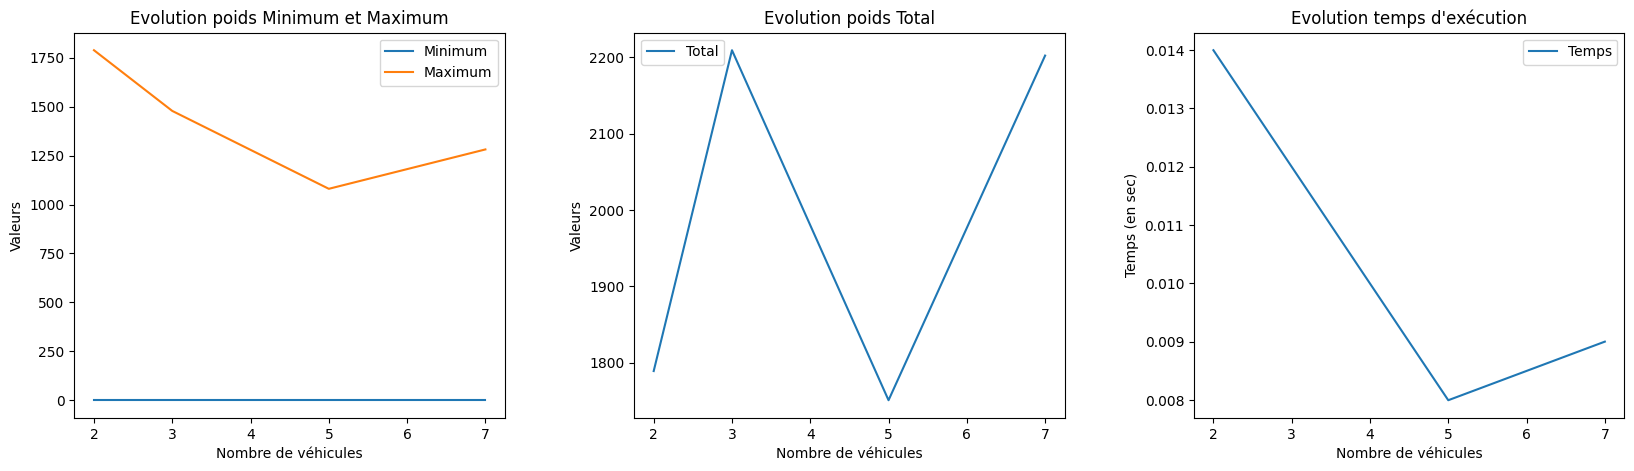

In [75]:
filename = "Instances/rat99.tsp"  # Modify this with the path to your file
num_vehicules = [2, 3, 5, 7]  # Modify the number of vehicules as desired

print("Solving MTSP")

points = read_tsp_file(filename)
depot = points[0]

minimum = []
maximum = []
totals = []

exec_time = []

for i in range (len(num_vehicules)) :
    routes, delta = MTSP_TimeTraveler(points, num_vehicules[i]+1)
    weights = []
    total_weight = 0
    
    for x, route in enumerate(routes):
        time = 0
        weight = sum(distance(route[j], route[j + 1]) for j in range(len(route) - 1))
        weights.append(weight)
        total_weight += weight
        time += delta
    
    exec_time.append(time)    
    minimum.append(min(weights))
    maximum.append(max(weights))
    totals.append(total_weight)
    #print("Camions ", num_vehicules[i], " time : ", time, " mini : ", min(weights), " max : ", max(weights), " total : ", total_weight)

print("MTSP solved")
    
# Creation of minimum and maximum weight evolution graph
plt.subplot(1, 3, 1)
plt.plot(num_vehicules, minimum, label='Minimum')
plt.plot(num_vehicules, maximum, label='Maximum')

plt.xlabel('Nombre de véhicules')
plt.ylabel('Valeurs')
plt.title('Evolution poids Minimum et Maximum')
plt.legend()

# Creation of total weight evolution graph
plt.subplot(1, 3, 2)
plt.plot(num_vehicules, totals, label='Total')

plt.xlabel('Nombre de véhicules')
plt.ylabel('Valeurs')
plt.title('Evolution poids Total')
plt.legend()

# Creation of execution time evolution graph
plt.subplot(1, 3, 3)
plt.plot(num_vehicules, exec_time, label='Temps')

plt.xlabel('Nombre de véhicules')
plt.ylabel('Temps (en sec)')
plt.title('Evolution temps d\'exécution')
plt.legend()

#Figsize
plt.subplots_adjust(wspace=0.3)
plt.rcParams["figure.figsize"] = (20, 5)

plt.show()                                           

Voici les résultat des performances de l'algorithme pour une instance bien définie (rat99), c'est résultats feront objet d'une critique dans la partie [Bilan](#bilan)

##### <u><b>Algorithme avec 2 000, 4 000, 6 000 et 8 000 camions, et un depot centré :</b></u>

Solving MTSP
MTSP solved


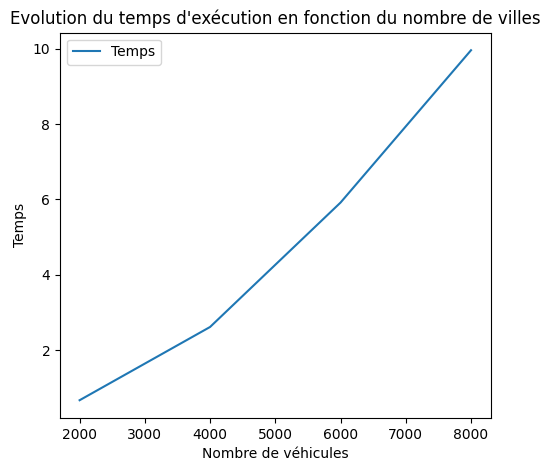

In [90]:
filenames = ["Instances/instance2K", "Instances/instance4K", "Instances/instance6K", "Instances/instance8K"]
instances = [2000, 4000, 6000, 8000]
num_vehicules = 10  # Modify the number of vehicules as desired

print("Solving MTSP")

minimum = []
maximum = []
totals = []
exec_time = []
for filename in filenames :
    points = read_tsp_file(filename)
    depot = points[0]
    
    routes, delta = MTSP_TimeTraveler(points, num_vehicules)
    
    weights = []
    total_weight = 0
    
    for x, route in enumerate(routes):
        time = 0
        weight = sum(distance(route[j], route[j + 1]) for j in range(len(route) - 1))
        weights.append(weight)
        total_weight += weight
        time += delta
        
    exec_time.append(time)    
    minimum.append(min(weights))
    maximum.append(max(weights))
    totals.append(total_weight)
    # print("Camions ", filename, " time : ", time, " mini : ", min(weights), " max : ", max(weights), " total : ", total_weight)

print("MTSP solved")
    
# Creation of minimum and maximum weight evolution graph
plt.subplot(1, 3, 1)
plt.plot(instances, exec_time, label='Temps')

plt.xlabel('Nombre de véhicules')
plt.ylabel('Temps')
plt.title('Evolution du temps d\'exécution en fonction du nombre de villes')
plt.legend()

#Figsize
plt.subplots_adjust(wspace=0.3)
plt.rcParams["figure.figsize"] = (20, 5)

plt.show()

Voici les résultat des performances de l'algorithme pour un jeu de grandes instances (2000, 4000, 6000 et 8000), c'est résultats feront objet d'une critique dans la partie [Bilan](#bilan)

### <u><b>Bilan et critique : </b></u><a name="bilan"></a>
A travers les tests ci-dessus on peut remarquer une tendance : <br>
<center><b>Plus notre dépot se trouve au centre du graphe, plus notre algorithme nous fournira une solution précise</b></center><br>

En effet on remarque avec nos instances centrées au centre (50,50) du graphe on a des performances et la qualité des solutions qui est très bonne (voir tableau comparatif sur le livrable principal), cependant la qualité des solutions diminue rapidement dès que le dépot s'éloigne du centre.

On peut voir qu'une exécution avec une instance où le dépot n'est pas centré telle que le rat99, on se retrouve avec des résultats totalements incohérents, dans cet [exemple](#exempleRat99) on a un dépot positionné en (6, 4) et on voit que la séparation en $k$ divisons de notre graphe ne fonctionnement plus corrêctement. Dans l'exemple on voit qu'il n'y a plus que 2 camions d'utilisés sur 4, cela est du au fait que notre système de partionnement du graphe répose sur la division du graphe grâce à un cercle dont le centre est le dépot.

<u>Idée d'amélioration :</u><br>
Modification du système partionnement du graphe pour qu'il établisse des zones de taille similaire, ceci devrait résoudre le problème de non-utilisation de certains camions